In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
import re
import random
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Unione delle cartelle immagini e caricamento dataset

os.chdir("/content/drive/My Drive/Progetto DL")

folder =  "./dati_genetici.zip"
images = []
labels = [] #etichette [0, 1] --> 0:neutral, 1:selection

#target_size = (48,1000) #Dimensione delle immagini

def load_images_from_folder_recursive(folder):
    """
    Entra ricorsivamente nelle directory che contengono le immagini dei dataset
    di training e di test, le legge e le aggiunge alla lista delle immagini.
    A ogni immagine viene associata un'etichetta: 0 se l'immagine è neutral,
    1 se è una selection.
    """
    for item_name in os.listdir(folder):
        item_path = os.path.join(folder, item_name)

        if os.path.isdir(item_path):
            print(f"Directory: {item_path}")
            load_images_from_folder_recursive(item_path)
        elif os.path.isfile(item_path):
            #print(f"file: {item_path}")
            if re.search(r"selection", item_path):
                labels.append(1)
            else:
                labels.append(0)
            img = cv2.imread(item_path)
            if img is not None:
            #if img.shape != (1000,48,3):
             #   img = cv2.resize(img, target_size)
              images.append(img)


load_images_from_folder_recursive(folder)


print(f"Loaded {len(images)} images.")
print(f"Loaded {len(labels)} labels.")

Directory: ./dati_genetici.zip/NEUTRAL
Directory: ./dati_genetici.zip/NEUTRAL/TEST_IMG
Directory: ./dati_genetici.zip/NEUTRAL/TRAIN_IMG
Directory: ./dati_genetici.zip/SELECTION
Directory: ./dati_genetici.zip/SELECTION/TEST_IMG
Directory: ./dati_genetici.zip/SELECTION/TRAIN_IMG
Loaded 2080 images.
Loaded 2080 labels.


In [4]:
#Eliminazione dell'immagine che ha un formato diverso (1002, 48, 3)

delete_img_index = []
for index,img in enumerate(images):
  if img.shape != (1000,48,3):
    delete_img_index.append(index)

for index in delete_img_index:
  images.pop(index)
  labels.pop(index)

print(f"Loaded {len(images)} images.")
print(f"Loaded {len(labels)} labels.")

Loaded 2079 images.
Loaded 2079 labels.


In [5]:
images[1].shape

(1000, 48, 3)

In [7]:
#Shuffle delle immagini e delle label (allo stesso modo)

shuffled = sorted(zip(images, labels), key=lambda _: random.random())
images, labels = zip(*shuffled)

X, y = np.array(images), np.array(labels)


[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]


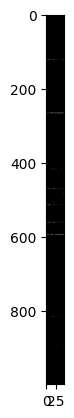

In [8]:
#suddivisione randomica del dataset tra train (70%) e test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#corversione e normalizzazione
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

print(X_train[1])
plt.imshow(X_train[1]);

[paper MobilNetV2](https://arxiv.org/pdf/1801.04381v4)

https://thesis.unipd.it/retrieve/8a7c5885-2e7a-4348-868b-9793b8b0bc4f/pignotti_matteo_tesi.pdf

<ipython-input-11-9bccd50f6aaf>:15: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(1000, 48, 3), include_top=False, weights='imagenet')


Epoch 1/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 18s 464ms/step - accuracy: 0.5558 - loss: 0.7188 - val_accuracy: 0.8109 - val_loss: 0.5286
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.7981 - loss: 0.5160 - val_accuracy: 0.8221 - val_loss: 0.4400
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.8027 - loss: 0.4477 - val_accuracy: 0.8253 - val_loss: 0.4025
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8212 - loss: 0.4201 - val_accuracy: 0.8237 - val_loss: 0.3879
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.7918 - loss: 0.4363 - val_accuracy: 0.8285 - val_loss: 0.3745
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8135 - loss: 0.4083 - val_accuracy: 0.8446 - val_loss: 0.3637
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 81ms/step - accuracy: 0.8292 - loss: 0.3884 - val_accuracy: 0.8365 - val_loss: 0.3605
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8146 - loss: 0.3932 - val_accuracy: 0.8462

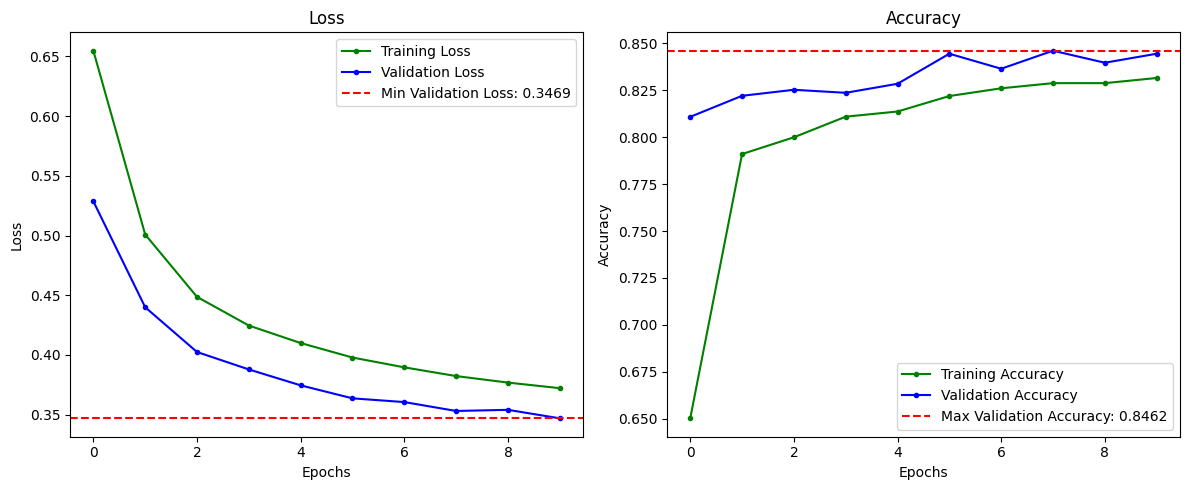

In [11]:
from tensorflow.keras.applications import MobileNetV2
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

#Creazone modelo MobilNetV2:
# - input_shape(1000, 48, 3) dimensioni delle immagini di input proposte
# - include_top=False, per non includere lo strato fully connected all'inizio della rete
# - weights='imagenet', utilizza i pesi ottimizzati sul dataset imagenet (pre-training on ImageNet)


base_model = MobileNetV2(input_shape=(1000, 48, 3), include_top=False, weights='imagenet')
base_model.trainable = False  # Per non fare fine tuning

#Incluso uno strato AveragePooling per diminuire le dimensioni delle immagini nell'output
#Aggiunta dello strato fully connected 1 neurone per la classificazione con la sigmoide

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


# Compilazione
#Ottimiazzatore scelto: Adam (ha dato prestazioni migliori rispetto a RMSProp.
#Learning rate: 0.0005

model.compile(optimizer=Adam(learning_rate=0.0005),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Addestramento
#Fatto su 10 epoche, batch_size=64 (funziona meglio di 32 nel nostro caso)
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    shuffle=True
)

# Plot: andamento di accuracy e loss in training/validation
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], 'g', marker='.', label='Training Loss')
plt.plot(history.history['val_loss'], 'b', marker='.', label='Validation Loss')
plt.axhline(min(history.history['val_loss']), color='red', linestyle='--', label=f'Min Validation Loss: {min(history.history["val_loss"]):.4f}')

plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], 'g', marker='.',label='Training Accuracy')
plt.plot(history.history['val_accuracy'],'b', marker='.', label='Validation Accuracy')
plt.axhline(max(history.history['val_accuracy']), color='red', linestyle='--', label=f'Max Validation Accuracy: {max(history.history["val_accuracy"]):.4f}')

plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()


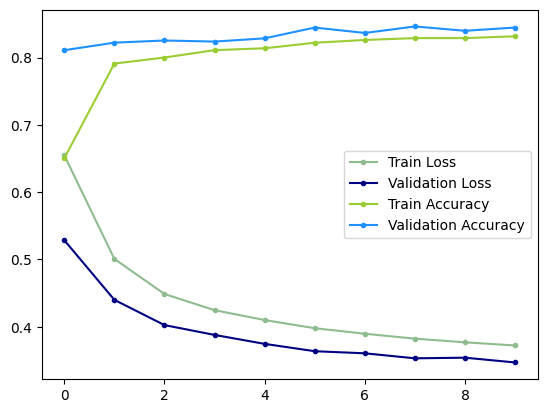

In [12]:
fig, ax = plt.subplots()
ax.plot(history.history["loss"],'darkseagreen', marker='.', label="Train Loss")
ax.plot(history.history["val_loss"],'navy', marker='.', label="Validation Loss")
ax.plot(history.history["accuracy"],'yellowgreen', marker='.', label="Train Accuracy")
ax.plot(history.history["val_accuracy"],'dodgerblue', marker='.', label="Validation Accuracy")
ax.legend()

In [13]:
base_model.summary()

Model: "mobilenetv2_1.00_224"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 1000, 48,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 500, 24,   │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 500, 24,   │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 500, 24,   │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 500, 24,   │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 24,   │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 500, 24,   │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 500, 24,   │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 500, 24,   │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 500, 24,   │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 501, 25,   │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 250, 12,   │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 12,   │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 250, 12,   │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 250, 12,   │      2,304 │ block_1_depthwis

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)